#Look at the data

In [0]:
#GPU information 
!cat /proc/meminfo

In [0]:
#Load key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#Load the data after mounting 
df= pd.read_csv("/content/drive/My Drive/retail_data/train.tsv",delimiter='\t')
df.head()

In [0]:
#Whats the shape of the dataframe?
df.shape

(1482535, 8)

In [0]:
#What are the columns?
df.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [0]:
#Know your column types
df.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [0]:
#Identify the columns with missing values
df.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

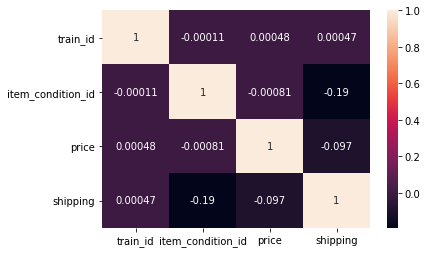

In [0]:
#How columns values are co-related?
sns.heatmap(df.corr(), annot=True)

# 1 A. Price Analysis- Price
Here, we will try to get the idea about the business. Following questions are raised after looking at the data above:

What is the overall condition of the products?
What is the shipment process and how it impacts the product price?
How important is the brand name, which brands are popular and which ones are most expensive?
What kind of products are popular and what kind of products are more expensive?
Is there any free product? Will start with price

In [0]:
# statistical analysis like percentile, mean, std dev
df.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [0]:
# statistical analysis
quants = [0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99]
df.quantile(quants)

,train_id,item_condition_id,price,shipping
0.05,74126.70,1.0,6.0,0.0
0.10,148253.40,1.0,7.0,0.0
0.25,370633.50,1.0,10.0,0.0
0.50,741267.00,2.0,17.0,0.0
0.75,1111900.50,3.0,29.0,1.0
0.95,1408407.30,3.0,75.0,1.0
0.99,1467708.66,4.0,170.0,1.0


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

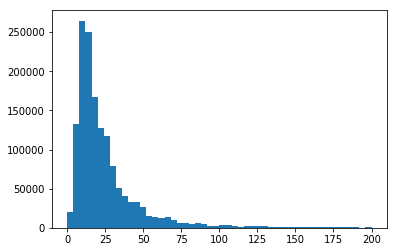

In [0]:
#Drawing price histogram 
plt.hist(df.price, bins= 50, range = [0,200])
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

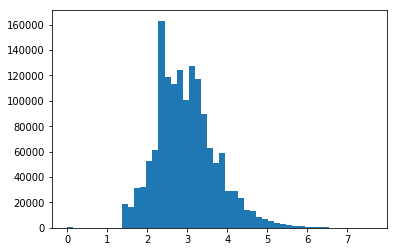

In [0]:
##Log price histogram 
plt.hist(np.log(df.price + 1), bins = 50)
plt

In [0]:
#Draw a scatter plot
plt.scatter(df.price.values, range(df.shape[0]))

In [0]:
#Seeing price range between 2 values
df.price.between(1700,2000).sum()

26

#1 B. Condition of the product

In [0]:
#How many cond IDs are there along with numbers?
df.item_condition_id.value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

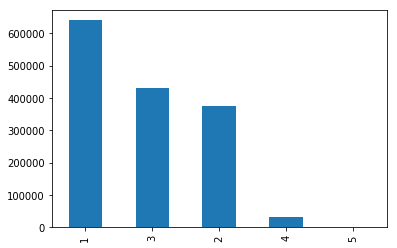

In [0]:
#plot all the IDs
df.item_condition_id.value_counts().plot.bar()

There are five unique values of item_condition_id with "1" being of highest frequency (fresh items) and "4", "5" (being the rarer ones) damaged ones

In [0]:
#check the description of the products
df.item_description[df.item_condition_id==5][:15]

258     Powers on, no screen display, no external dama...
653                                    No description yet
1027                 10k gold 18" chain. Broken at clasp.
2436    For parts . Turns on and hold battery charge ....
2803    2 pounds of junk jewelry, There are some items...
3177                                   No description yet
3394                                  For parts or repair
4948         moving out so just dont wanna keep For Free！
5055                      Powers on but won't play games.
5938    Alex and ani rafaelian gold set of four bracel...
6301    Poor conditon kd 6 Aunt pearl. Really beat. Co...
6429    Still functional if you were to charge it, fro...
6443                           Old damaged personal phone
6900    I have no information on this nook! It needs a...
7159                                   No description yet
Name: item_description, dtype: object

Words like brand new, new and shows that item_condition_id=1 represent good condition products
Description shows that item_condition_id=5 represent worse condition products. e.g. Powers on, no screen display, Broken at clasp etc

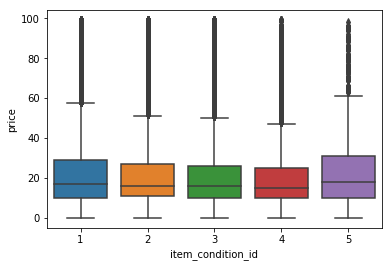

In [0]:
sns.boxplot(x='item_condition_id', y='price', data=df[df['price']<100])

Overall, we can observe a slight decrease in prices of the products as its condition_id move from 1 to 4. In case of condition_id 5, the price distribution is wider, that might be because of its very less frequency (as observed in the previous graph), there are not enough data points to compare with other categories.

#1 C. Shipment of prodcuts 

In [0]:
df.head()

In [0]:
#How is shipping column looking like
df.shipping.head()

In [0]:
#count & % of 0s and 1s
df.shipping.value_counts(normalize=True)

0    0.552726
1    0.447274
Name: shipping, dtype: float64

In [0]:
# price analysis for different shipping conditions
df.groupby('shipping').price.mean()

shipping
0    30.111778
1    22.567726
Name: price, dtype: float64

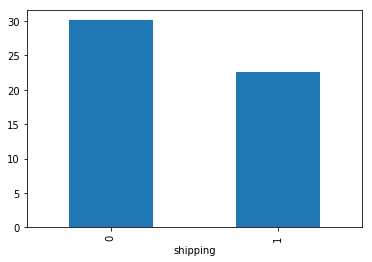

In [0]:
#Can we plot the same?
df.groupby('shipping').price.mean().plot.bar()

Items with shipping, where seller is responsible for shipping, seems to be *cheaper*

#1 D.  How important is the brand name?

In [0]:
df.brand_name.head()

0       NaN
1     Razer
2    Target
3       NaN
4       NaN
Name: brand_name, dtype: object

In [0]:
#How many unique brands we have?
df.brand_name.nunique()

4809

In [0]:
#Total branded products
df.brand_name.unique()

array([nan, 'Razer', 'Target', ..., 'Astroglide', 'Cumberland Bay',
       'Kids Only'], dtype=object)

In [0]:
#Total unbranded products
df.brand_name.isnull().sum()

632682

In [0]:
#mean price of branded products
df.groupby('brand_name').price.mean().head()

brand_name
!iT Jeans        16.000000
% Pure           16.344262
10.Deep          17.333333
191 Unlimited    36.000000
1byone           51.000000
Name: price, dtype: float64

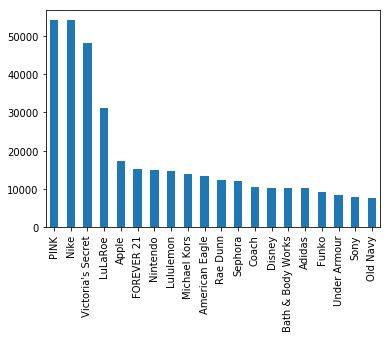

In [0]:
#top most frequent brands can we plot?
df.brand_name.value_counts().nlargest(20).plot.bar()

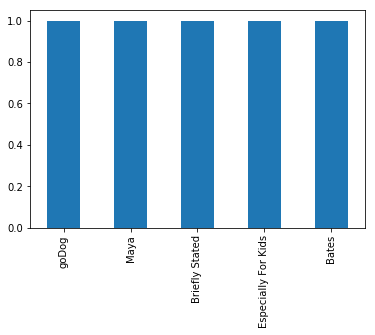

In [0]:
df.brand_name.value_counts().nsmallest(5).plot.bar()

In [0]:
#Using sns
brands = df.brand_name.value_counts()
brands[1:11].values, brands[1:11].index

(array([54043, 48036, 31024, 17322, 15186, 15007, 14558, 13928, 13254,
        12305]),
 Index(['Nike', 'Victoria's Secret', 'LuLaRoe', 'Apple', 'FOREVER 21',
        'Nintendo', 'Lululemon', 'Michael Kors', 'American Eagle', 'Rae Dunn'],
       dtype='object'))

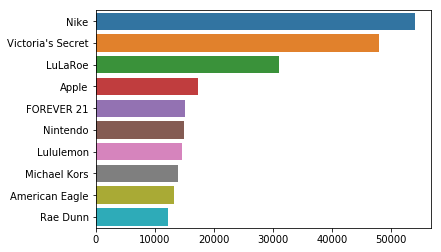

In [0]:
sns.barplot(brands[1:11].values, brands[1:11].index)

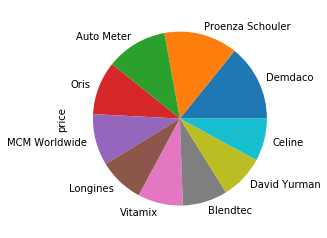

In [0]:
## most expensive brand
df.groupby('brand_name').price.mean().nlargest(10).plot.pie()

In [0]:
#Draw Top 10 expensive n cheapest brands


#1 E. Categories of products

In [0]:
df.category_name.head()

0                                    Men/Tops/T-shirts
1    Electronics/Computers & Tablets/Components & P...
2                          Women/Tops & Blouses/Blouse
3                   Home/Home Décor/Home Décor Accents
4                              Women/Jewelry/Necklaces
Name: category_name, dtype: object

In [0]:
#unique values in the category column?
df.category_name.nunique()

1287

In [0]:
#list of unique?
df.category_name.unique()

array(['Men/Tops/T-shirts',
       'Electronics/Computers & Tablets/Components & Parts',
       'Women/Tops & Blouses/Blouse', ..., 'Handmade/Jewelry/Clothing',
       'Vintage & Collectibles/Supplies/Ephemera',
       'Handmade/Pets/Blanket'], dtype=object)

In [0]:
#total catagory names along with numbers?
df.category_name.value_counts().head()

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
Name: category_name, dtype: int64

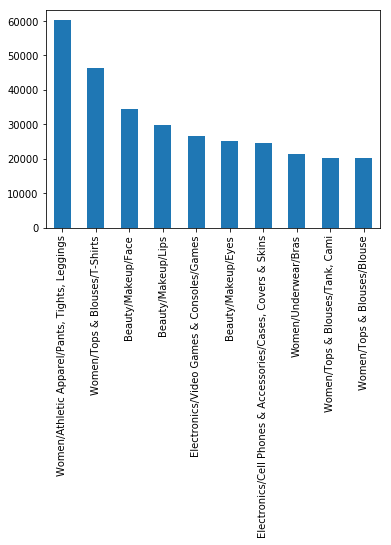

In [0]:
#Plot top 10
df.category_name.value_counts().nlargest(10).plot.bar()

Category Prices

In [0]:
#Top/bottom 10 categories by average price
df.groupby('category_name').price.mean().nlargest(10)


category_name
Vintage & Collectibles/Antique/Furniture                  195.000000
Handmade/Bags and Purses/Clutch                           180.222222
Electronics/Computers & Tablets/Laptops & Netbooks        177.089176
Kids/Strollers/Standard                                   163.666667
Electronics/Computers & Tablets/Desktops & All-In-Ones    149.329412
Vintage & Collectibles/Bags and Purses/Handbag            139.562546
Kids/Strollers/Travel Systems                             124.600000
Home/Home Appliances/Air Conditioners                     121.142857
Kids/Strollers/Lightweight                                117.111111
Electronics/Cameras & Photography/Digital Cameras         112.305349
Name: price, dtype: float64

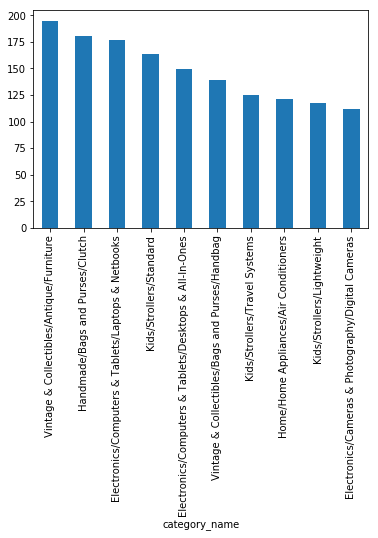

In [0]:
#Draw the same
df.groupby('category_name').price.mean().nlargest(10).plot.bar()


In [0]:
df.category_name.head()

0                                    Men/Tops/T-shirts
1    Electronics/Computers & Tablets/Components & P...
2                          Women/Tops & Blouses/Blouse
3                   Home/Home Décor/Home Décor Accents
4                              Women/Jewelry/Necklaces
Name: category_name, dtype: object

In [0]:
# How to break into diff categories?
df.category_name.str.split('/', expand=True).head()

,0,1,2,3,4
0,Men,Tops,T-shirts,None,None
1,Electronics,Computers & Tablets,Components & Parts,None,None
2,Women,Tops & Blouses,Blouse,None,None
3,Home,Home Décor,Home Décor Accents,None,None
4,Women,Jewelry,Necklaces,None,None


In [0]:
#Expand into series


In [0]:
#Grabbing the first items in category?
df.category_name.str.split('/').str.get(0).head()

0            Men
1    Electronics
2          Women
3           Home
4          Women
Name: category_name, dtype: object

In [0]:
df.shape

(1482535, 8)

In [0]:
#Create seperate columns with category names
df['main'] = df.category_name.str.split('/').str.get(0)

In [0]:
df['cat1'] = df.category_name.str.split('/').str.get(1)
df['cat2'] = df.category_name.str.split('/').str.get(2)
df['cat3'] = df.category_name.str.split('/').str.get(3)

In [0]:
df.shape

(1482535, 12)

In [0]:
df.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'main', 'cat2', 'cat3',
       'cat1'],
      dtype='object')

In [0]:
df.main.nunique()

10

In [0]:
df.main.value_counts()

In [0]:
#How many within Kids category?
df.category_name[df.main=='Kids'].head()

In [0]:
df[df.main=='Kids'].head()

In [0]:
#Kids and cat1?
df[df.main=='Kids'].cat1.value_counts()

In [0]:
#Kids and cat2?
df[df.main=='Kids'].cat2.value_counts()

Popular Categories by count

In [0]:
# How many in  main  category
df.main.count(), df.main.value_counts()

In [0]:
## Plotting the same
df.main.value_counts().plot(kind = 'bar')

In [0]:
#How many in cat1?
df.cat1.value_counts()


In [0]:
#some more combinations..
df.category_name[df.cat1=='Shoes'].head()


In [0]:
##some more
df[df.cat1=='Shoes'].cat2.value_counts()

In [0]:
#Optional--> Graphs using Seaborne. zooming to second level
# We stock each variable's repartition into a dictionary
alldf = {}
for col in df.main[df.main.isnull() == False].unique() :

    temp = df.cat1[df['main'] == col]
    temp = pd.DataFrame(temp.value_counts().reset_index())
    
    alldf[col] = temp

# Now we can plot it    
i = 0
fig, axs = plt.subplots(5,2, figsize=(15,25))   
plt.suptitle('Zoom on the second level of categories', fontsize = 25) 

for cat in alldf:
    temp = alldf[cat]
    sns.barplot('cat1', 'index', data = temp, ax = axs.flatten()[i])
    axs.flatten()[i].set_ylabel('')
    axs.flatten()[i].set_xlabel('Frequency')
    i+=1    

In [0]:
#Expensive Categories and Subcategories
df.groupby(['main'])['price'].mean().plot()
fig, ax = plt.subplots(figsize=(15,7))

In [0]:
#using seaborne
sns.barplot( x = 'main' , y = 'price', data = df)

In [0]:
#Top 10 expensive products within 'main'
df.groupby(['main'])['price'].mean().nlargest(10)

In [0]:
##Top 10 expensive products within 'cat1'


In [0]:
#Top 10 expensive products within 'main,cat1.cat2' & plot
df.groupby(['main','cat1','cat2'])['price'].mean().nlargest(10).plot(kind='bar')

In [0]:
#Is there any free product?
fp = df[df.price==0]
len(fp)

In [0]:
#free product? in good condtion?
bfp = fp[fp.item_condition_id==1]
len(bfp)

In [0]:
best_free_products = free_products[free_products.item_condition_id==1]
best_free_products.shape[0]

In [0]:
#Best free product w shipment
bfpws = bfp[bfp.shipping==1]
len(bfpws)


In [0]:
best_free_products_shipping = best_free_products[best_free_products.shipping==1]
best_free_products_shipping.shape[0]

In [0]:
bfpwsN = bfpws[bfpws.brand_name=='Nike']
bfpwsN, len(bfpwsN)

In [0]:
# Box plot using sns
sns.boxplot(x='main', y='price', data=df[df['price']<100])

#Pandas utility

In [0]:
#Using pandas Profiling
import pandas_profiling
pfr = pandas_profiling.ProfileReport(df)

In [0]:
#Storing the same
pfr.to_file("/content/retail.html")

#ML Algo

In [0]:
df= pd.read_csv('/content/drive/My Drive/retail_data/train.tsv',delimiter='\t')
df_test= pd.read_csv("/content/drive/My Drive/retail_data/test.tsv",delimiter='\t')

In [0]:
df_test.shape, df.shape

((693359, 7), (1482535, 8))